<h3 style = "font-family: Comic Sans MS;background-color:#D7BDE2;padding: 10px;">Importing dependencies</h3>

In [36]:
#basic libraries

import numpy as np
import pandas as pd

#visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

<h3 style = "font-family: Comic Sans MS;background-color:#D7BDE2;padding:10px">Exploring dataset</h3>

In [188]:
df = pd.read_csv("./dataset.csv")

In [189]:
df.head()

,Price,Street,Area,City,Type,Bedrooms,Bathrooms,Size(Sq. Ft.),Parking Space,Balcony or Terrace,Double Glazed Windows,Maintenance Staff,View,Pet Policy,Lobby in Building,Family or Bachelor,Rent Year
0,17000,Section 2,Mirpur,Dhaka,Apartment,3,3,1120,Yes,Yes,Yes,Yes,North,No,Yes,Yes,2017
1,12000,Goran,Khilgaon,Dhaka,Room,2,2,730,No,No,No,No,North,No,No,Yes,2018
2,24000,Free School Street,Kathalbagan,Dhaka,Apartment,3,2,1100,Yes,Yes,Yes,Yes,East,Yes,Yes,Yes,2018
3,13720,Donia,Jatra Bari,Dhaka,Room,2,2,930,No,No,Yes,Yes,East,No,No,Yes,2017
4,32000,Sector 6,Uttara,Dhaka,Duplex,4,4,1965,Yes,Yes,Yes,No,East,No,Yes,Yes,2018


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3504 entries, 0 to 3503
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Price                  3504 non-null   int64 
 1   Street                 3504 non-null   object
 2   Area                   3504 non-null   object
 3   City                   3503 non-null   object
 4   Type                   3504 non-null   object
 5   Bedrooms               3504 non-null   int64 
 6   Bathrooms              3504 non-null   int64 
 7   Size(Sq. Ft.)          3504 non-null   int64 
 8   Parking Space          3504 non-null   object
 9   Balcony or Terrace     3504 non-null   object
 10  Double Glazed Windows  3504 non-null   object
 11  Maintenance Staff      3504 non-null   object
 12  View                   3504 non-null   object
 13  Pet Policy             3504 non-null   object
 14  Lobby in Building      3504 non-null   object
 15  Family or Bachelor   

<h3 style = "font-family: Comic Sans MS;background-color:#D7BDE2;padding:10px">Understanding the Columns</h3>

In [244]:
list_col = df.columns
values_col = []
for colIndex, col in enumerate(list_col): 
    if (len(df[col].unique()) > 10): values_col = ''
    else: values_col = df[col].unique()
    print('{}. {} {}'.format(colIndex + 1, col, values_col))

1. Price 
2. Street 
3. Area 
4. City ['Dhaka' 'Badda' 'Other' 'Malibagh' 'Banasree']
5. Type ['Apartment' 'Room' 'Duplex']
6. Bedrooms [3 2 4 1 5]
7. Bathrooms [3 2 4 1 5 6]
8. Size(Sq. Ft.) 
9. Parking Space ['Yes' 'No']
10. Balcony or Terrace ['Yes' 'No']
11. Double Glazed Windows ['Yes' 'No']
12. Maintenance Staff ['Yes' 'No']
13. View ['North' 'East' 'West' 'South']
14. Pet Policy ['No' 'Yes']
15. Lobby in Building ['Yes' 'No']
16. Family or Bachelor ['Yes' 'No']
17. Rent Year [2017 2018 2016]


<h3 style = "font-family: Comic Sans MS;background-color:#D7BDE2;padding:10px">Data Preparation</h3>

Cleaning House types there are 1 value with 'd' so it will be replaced by 'Duplex'

In [192]:
df['Type'].replace(['d'], 'Duplex', inplace = True)

Cleaning city values nan values and extra spaces

In [193]:
df['City'].replace([' Dhaka'], 'Dhaka', inplace = True)
df['City'].replace([' Badda'], 'Badda', inplace = True)
df['City'].replace([' Malibagh'], 'Malibagh', inplace = True)
df['City'].replace([' Banasree'], 'Banasree', inplace = True)
df['City'].replace([np.nan], 'Other', inplace = True)

Cleaning View values there are duplicated values

In [194]:
df['View'].replace(['west'], 'West', inplace = True)

Analyze dataset remaining null values

In [204]:
df.isnull().sum()

Price                    0
Street                   0
Area                     0
City                     0
Type                     0
Bedrooms                 0
Bathrooms                0
Size(Sq. Ft.)            0
Parking Space            0
Balcony or Terrace       0
Double Glazed Windows    0
Maintenance Staff        0
View                     0
Pet Policy               0
Lobby in Building        0
Family or Bachelor       0
Rent Year                0
dtype: int64

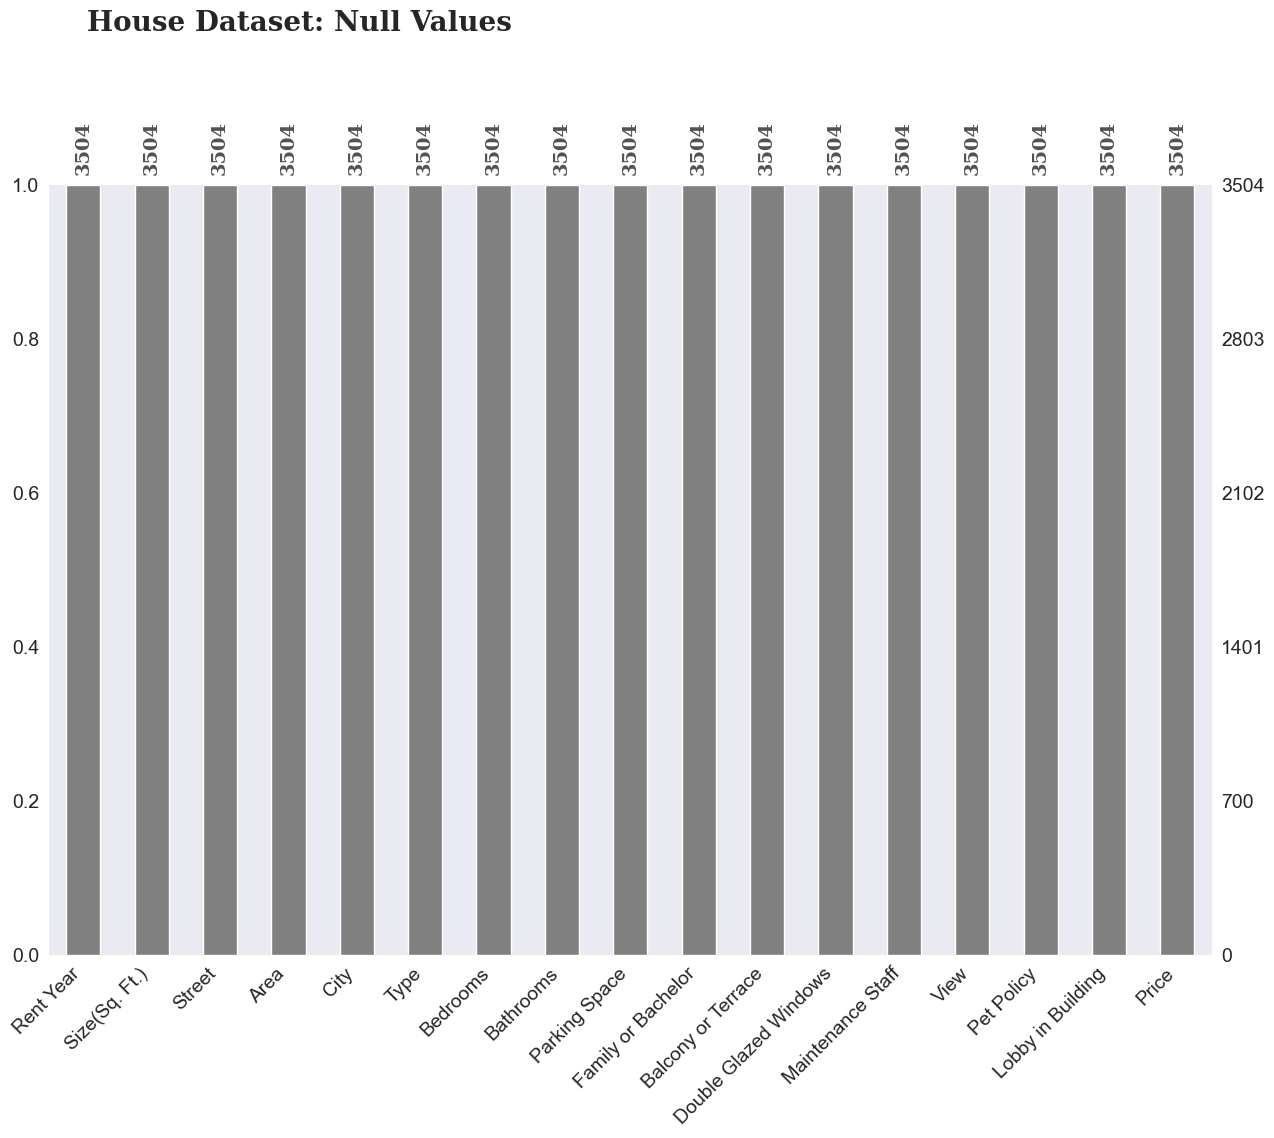

In [205]:
sns.set_style('dark')
color = ['grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey', 'grey','grey','grey','grey', 'grey']
msno.bar(df,fontsize =14, color = color, sort = 'descending', figsize = (15,10))

plt.text(0.05,1.20,'House Dataset: Null Values', {'font':'serif', 'size':20, 'weight':'bold'})
plt.xticks( rotation = 90, **{'font':'serif','size':14,'weight':'bold','horizontalalignment': 'center'},alpha = 0.8)

plt.show()

<h3 style = "font-family: Comic Sans MS;background-color:#D7BDE2;padding:10px">Data Analysis</h3>

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 ]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35'),
  Text(0, 0.4, '0.40')])

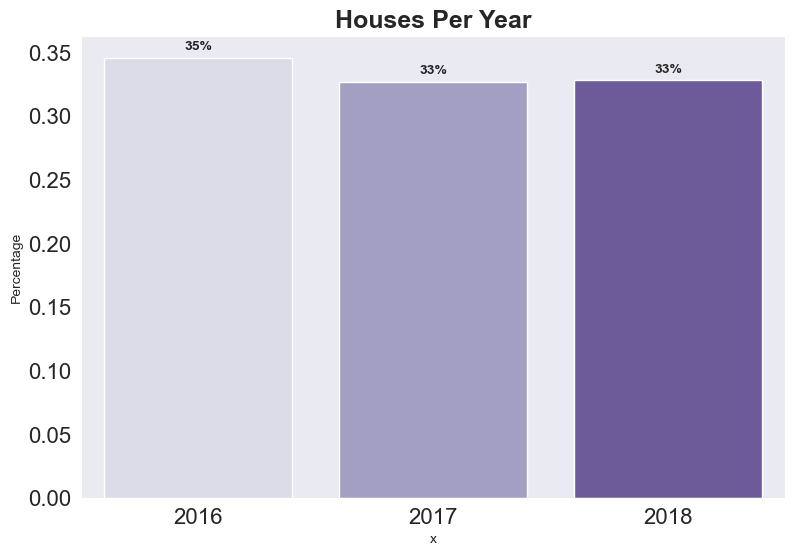

In [268]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['Rent Year'].value_counts(normalize = True).rename_axis('x').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'x', y = 'Percentage', data = eda_percentage, palette = 'Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Houses Per Year', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

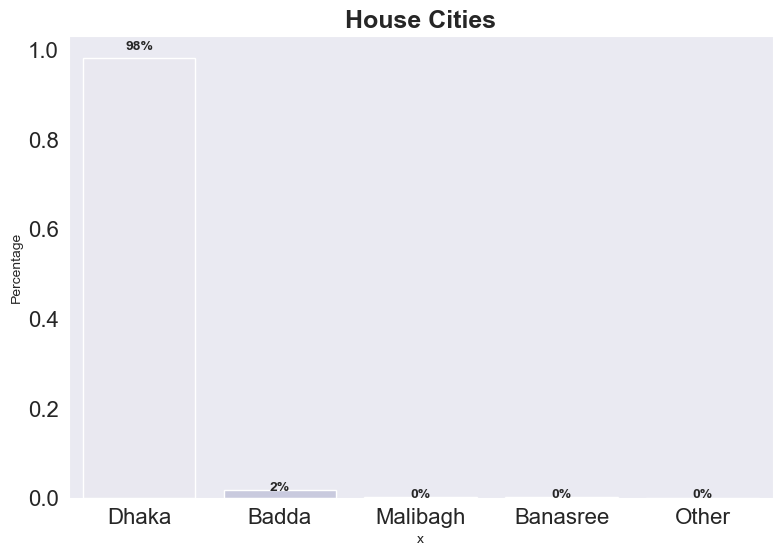

In [274]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['City'].value_counts(normalize = True).rename_axis('x').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'x', y = 'Percentage', data = eda_percentage, palette = 'Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('House Cities', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5')])

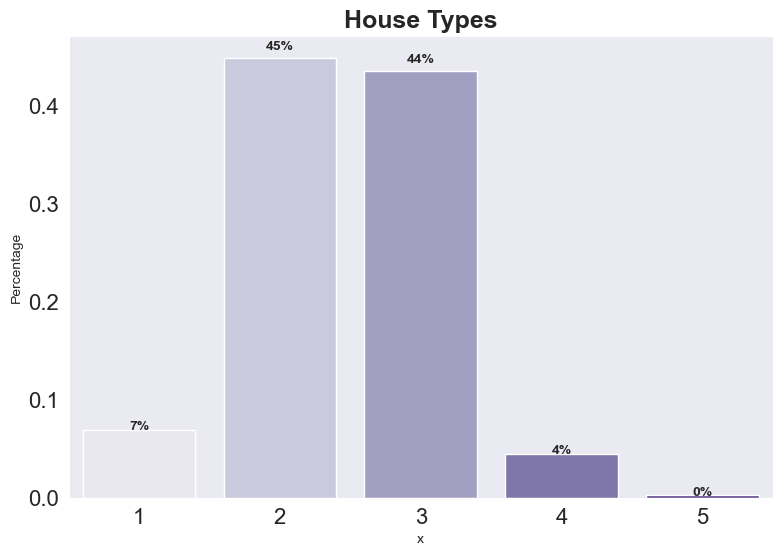

In [275]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['Type'].value_counts(normalize = True).rename_axis('x').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'x', y = 'Percentage', data = eda_percentage, palette = 'Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('House Types', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5')])

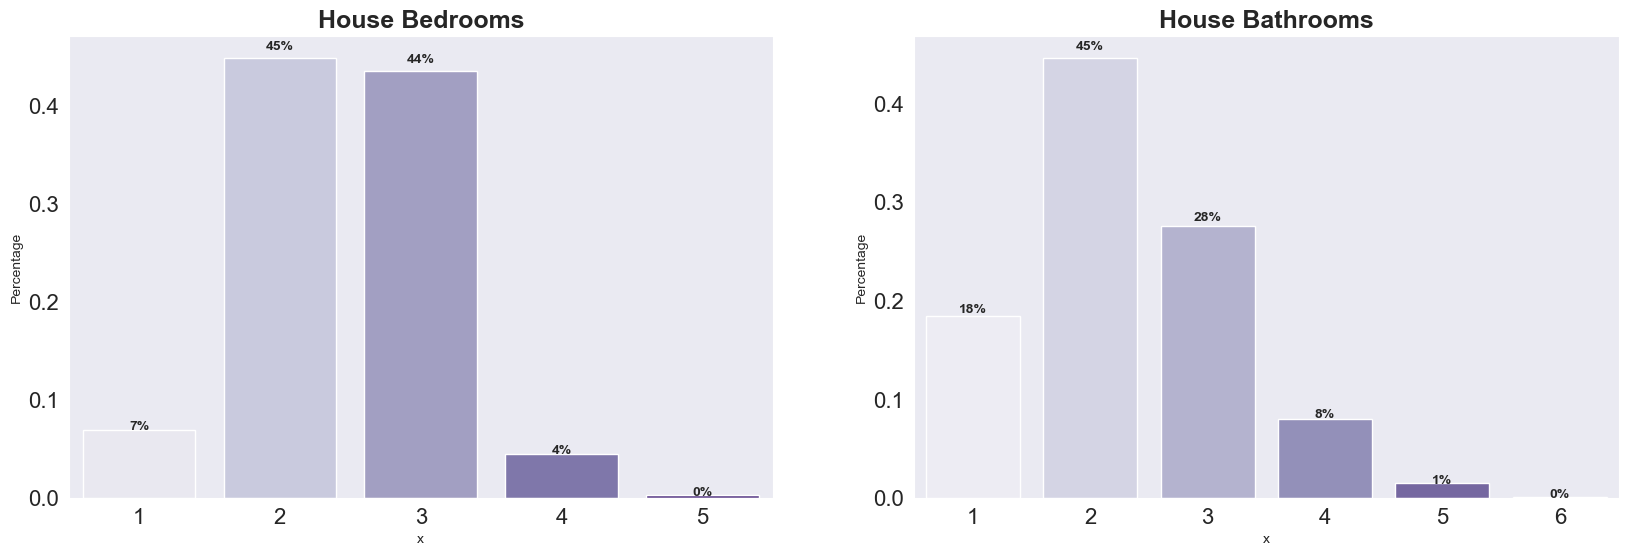

In [279]:
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)
eda_percentage = df['Bedrooms'].value_counts(normalize = True).rename_axis('x').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'x', y = 'Percentage', data = eda_percentage, palette = 'Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
plt.title('House Bedrooms', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1,2,2)
eda_percentage = df['Bathrooms'].value_counts(normalize = True).rename_axis('x').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'x', y = 'Percentage', data = eda_percentage, palette = 'Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
plt.title('House Bathrooms', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0')])

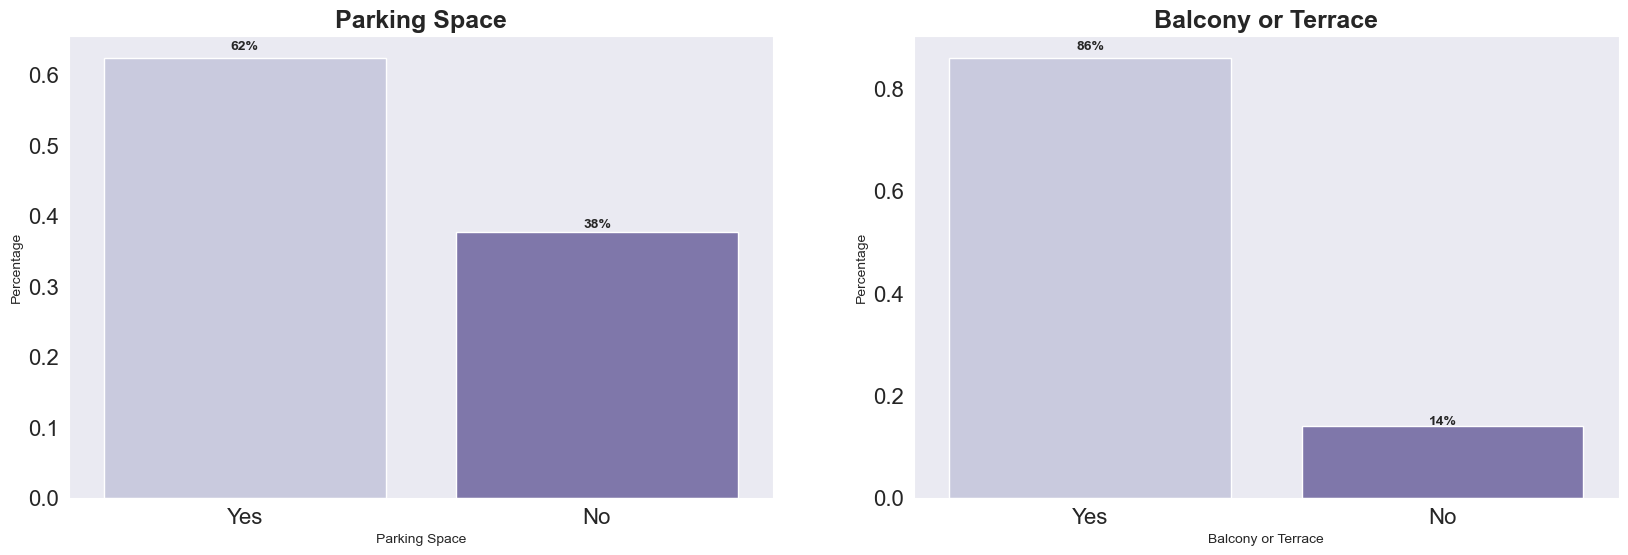

In [260]:
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)
eda_percentage = df['Parking Space'].value_counts(normalize = True).rename_axis('Parking Space').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'Parking Space', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
plt.title('Parking Space', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1,2,2)
eda_percentage = df['Balcony or Terrace'].value_counts(normalize = True).rename_axis('Balcony or Terrace').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'Balcony or Terrace', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
plt.title('Balcony or Terrace', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8')])

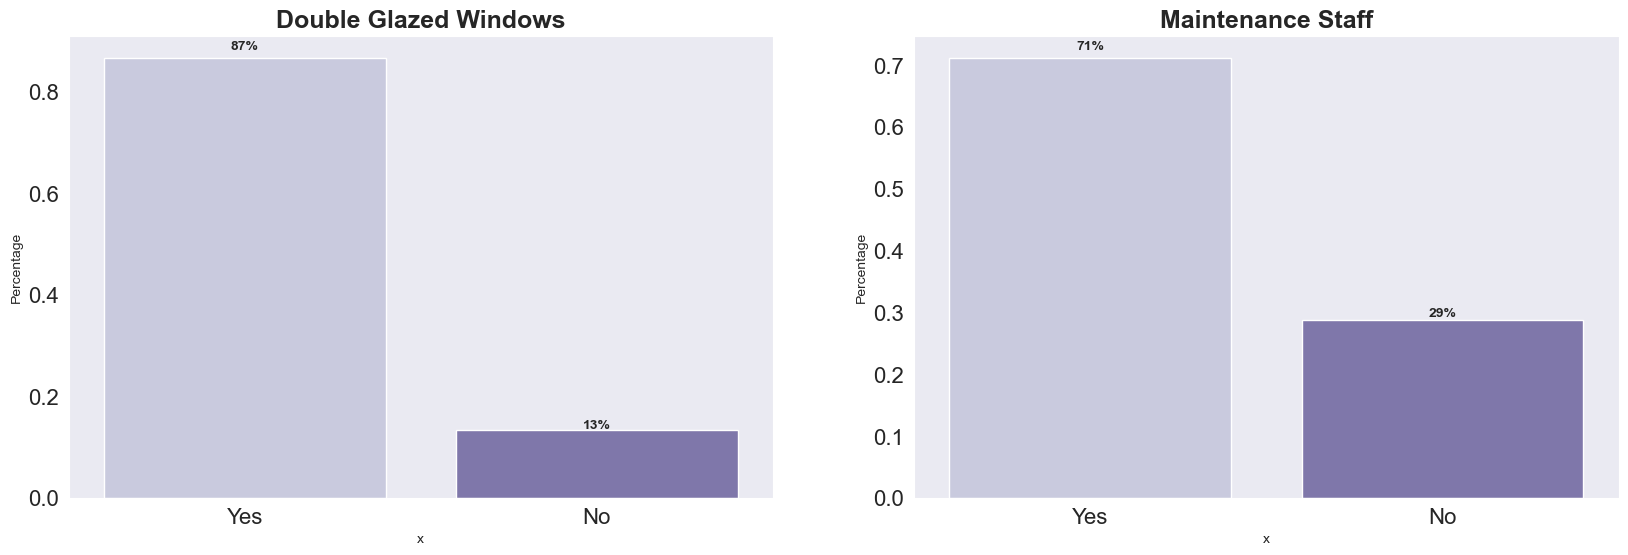

In [262]:
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)
eda_percentage = df['Double Glazed Windows'].value_counts(normalize = True).rename_axis('x').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'x', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
plt.title('Double Glazed Windows', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1,2,2)
eda_percentage = df['Maintenance Staff'].value_counts(normalize = True).rename_axis('x').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'x', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
plt.title('Maintenance Staff', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 ]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35'),
  Text(0, 0.4, '0.40')])

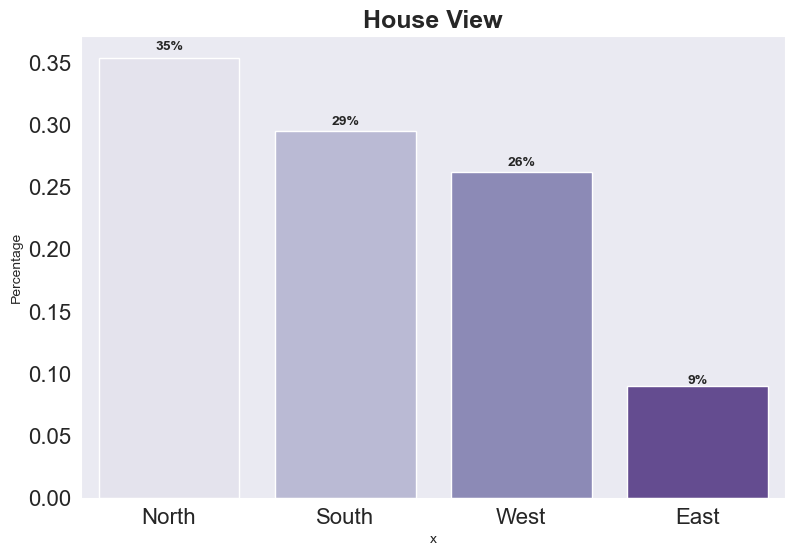

In [280]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['View'].value_counts(normalize = True).rename_axis('x').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'x', y = 'Percentage', data = eda_percentage, palette = 'Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('House View', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9, '0.9')])

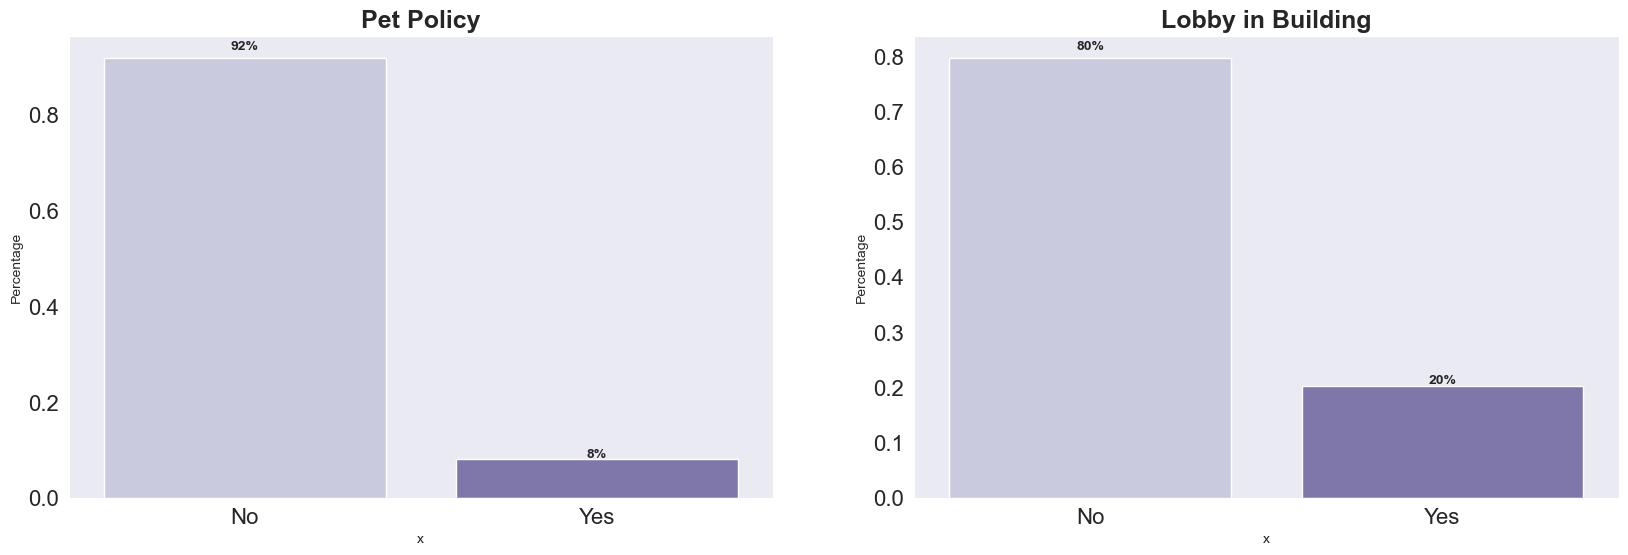

In [263]:
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)
eda_percentage = df['Pet Policy'].value_counts(normalize = True).rename_axis('x').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'x', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
plt.title('Pet Policy', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1,2,2)
eda_percentage = df['Lobby in Building'].value_counts(normalize = True).rename_axis('x').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'x', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
plt.title('Lobby in Building', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

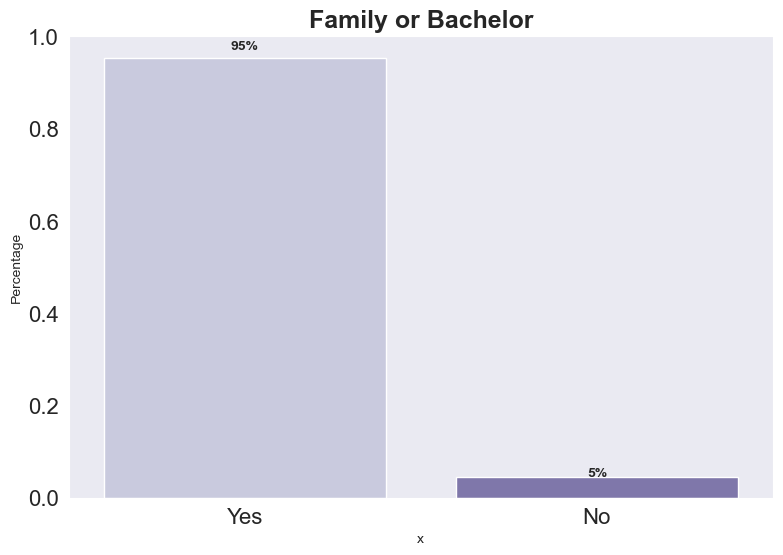

In [282]:
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)
eda_percentage = df['Family or Bachelor'].value_counts(normalize = True).rename_axis('x').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'x', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
plt.title('Family or Bachelor', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3504 entries, 0 to 3503
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Price                  3504 non-null   int64 
 1   Street                 3504 non-null   object
 2   Area                   3504 non-null   object
 3   City                   3504 non-null   object
 4   Type                   3504 non-null   object
 5   Bedrooms               3504 non-null   int64 
 6   Bathrooms              3504 non-null   int64 
 7   Size(Sq. Ft.)          3504 non-null   int64 
 8   Parking Space          3504 non-null   object
 9   Balcony or Terrace     3504 non-null   object
 10  Double Glazed Windows  3504 non-null   object
 11  Maintenance Staff      3504 non-null   object
 12  View                   3504 non-null   object
 13  Pet Policy             3504 non-null   object
 14  Lobby in Building      3504 non-null   object
 15  Family or Bachelor   

In [225]:
df.isnull().sum()

Price                    0
Street                   0
Area                     0
City                     0
Type                     0
Bedrooms                 0
Bathrooms                0
Size(Sq. Ft.)            0
Parking Space            0
Balcony or Terrace       0
Double Glazed Windows    0
Maintenance Staff        0
View                     0
Pet Policy               0
Lobby in Building        0
Family or Bachelor       0
Rent Year                0
dtype: int64

In [240]:
list_col = ['Price', 'Street', 'Area', 'City', 'Type', 'Bedrooms', 'Bathrooms',
       'Size(Sq. Ft.)', 'Parking Space', 'Balcony or Terrace',
       'Double Glazed Windows', 'Maintenance Staff', 'View', 'Pet Policy',
       'Lobby in Building', 'Family or Bachelor', 'Rent Year']

for col in list_col: 
    print('{} :{} ' . format(col.upper(),df[col].unique()))

PRICE :[ 17000  12000  24000  13720  32000  25000  16000  15000  14000  40000
   9000   8000  11000  13000  18000  20000  23000  26000  13500  17800
  45000  14500  19000  11500   7500  16500  12500  28000  22000  27000
  46000  35000  70000  10000  34000   6000   9900  20500   8500  10500
   9500  21000  17500   6500  50000  11800  55000  30000  85000   4000
  80000  15500  31000  66000  39500  25500  21500  15100  70500  75500
  75000 100000  65000  24500  37000  38000  33000   7000   6200  18500
   5000  60000  18150   5500  36000  17700 120000  49000  56000  82000
  44500  49500  29000  35500  42000 150000  67000  41000  57000   4700
  19500  23500  47000 106000  14100  52000  44000  48000  16300  60500
  77000   8700  40500  15400  22500  30500 180000  32500  13800  95000
  96000  45500  90000 110000  13300  78000  11200 250000   7150  33500
   9700  27500  19600  25600  20800 130000  15800 105000  54000 300000
   9800   7800  12200   9300  28500   8800  25003] 
STREET :['Section 

- Now, we are going to see the data correlation
- We have to encode the categories data 

In [239]:
import copy

dfTemp = copy.deepcopy(df);
from sklearn.preprocessing import LabelEncoder
object_cols = ['Type', 'Parking Space', 'Balcony or Terrace',
       'Double Glazed Windows', 'Maintenance Staff', 'View', 'Pet Policy',
       'Lobby in Building', 'Family or Bachelor']
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(dfTemp[col])
    dfTemp[col] = label_encoder.transform(dfTemp[col])

In [238]:
# Compute the correlation matrix
corr = dfTemp.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='Purples', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

ValueError: could not convert string to float: 'Section 2'